In [2]:
import pandas as pd

## Import Datasets

In [3]:
train = pd.read_csv("data/bike-sharing/train.csv")

print(train.shape)
train.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test = pd.read_csv("data/bike-sharing/test.csv")

print(test.shape)
test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


## Exploratory Data Analysis(EDA)

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

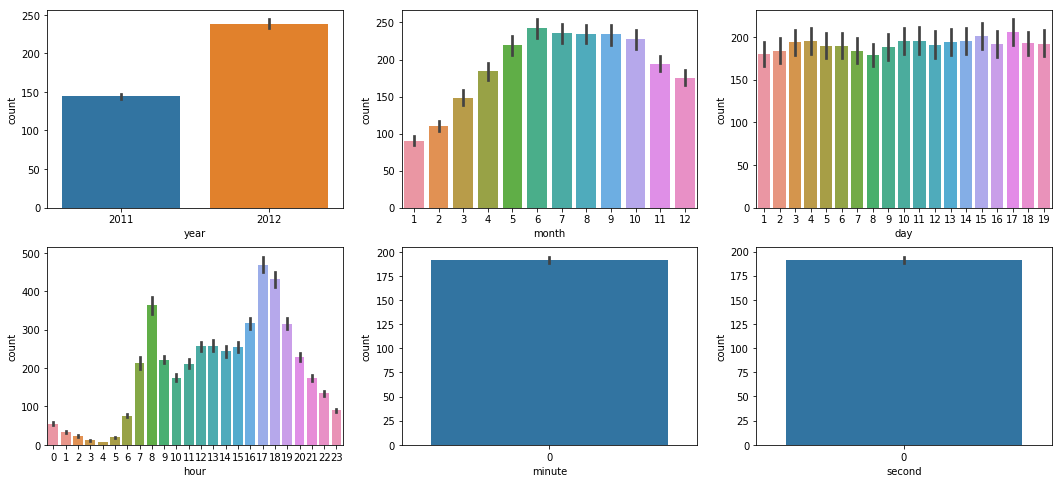

In [31]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

figure.set_size_inches(18, 8)

sns.barplot(data=train, x='year', y='count', ax=ax1)
sns.barplot(data=train, x='month', y='count', ax=ax2)
sns.barplot(data=train, x='day', y='count', ax=ax3)
sns.barplot(data=train, x='hour', y='count', ax=ax4)
sns.barplot(data=train, x='minute', y='count', ax=ax5)
sns.barplot(data=train, x='second', y='count', ax=ax6)

In [ ]:
plt.figure(figsize=(18, 8))

sns.pointplot(data=train, x='hour', y='count', color='red')
sns.pointplot(data=train, x='hour', y='casual', color='green')
sns.pointplot(data=train, x='hour', y='registered')

In [ ]:
plt.figure(figsize=(18, 8))

sns.barplot(data=train, x='year-month', y='count')

In [ ]:
train.corr()

In [ ]:
plt.figure(figsize=(14, 6))

sns.barplot(data=train, x='weather', y='count')

In [ ]:
# weahter 4인 데이터 검색
train[train['weather'] == 4]

In [ ]:
test[test['weather'] == 4]

In [ ]:
# plt.figure(figsize=(14, 6))

sns.lmplot(data=train, x='temp', y='atemp', height=5, aspect=1,
          fit_reg=False, hue='month')

In [ ]:
plt.figure(figsize=(14, 6))

sns.distplot(train['windspeed'])

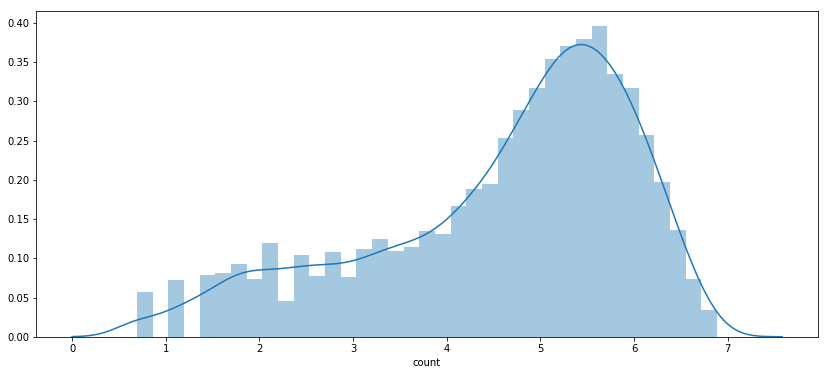

In [157]:
plt.figure(figsize=(14, 6))

# sns.distplot(train['count'])
sns.distplot(np.log(train['count'] + 1))

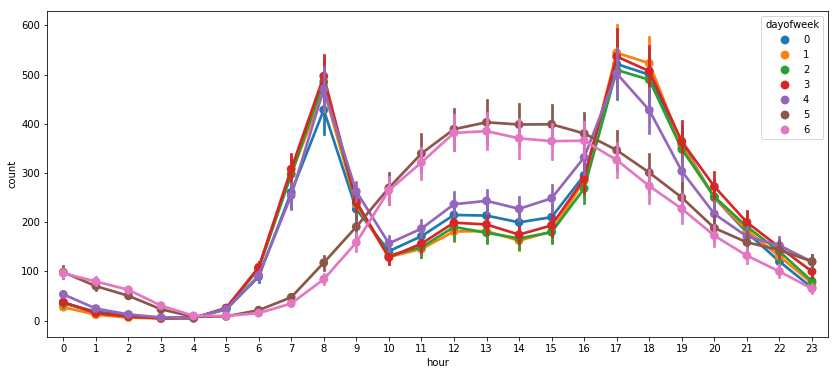

In [143]:
plt.figure(figsize=(14, 6))

sns.pointplot(data=train, x='hour', y='count', hue='dayofweek')

In [ ]:
train.isnull().sum()

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
datetime      6493 non-null object
season        6493 non-null int64
holiday       6493 non-null int64
workingday    6493 non-null int64
weather       6493 non-null int64
temp          6493 non-null float64
atemp         6493 non-null float64
humidity      6493 non-null int64
windspeed     6493 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [ ]:
train.dtypes

## Preprocessing

In [140]:
train['datetime'] = pd.to_datetime(train['datetime'])

train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
# train['datetime'].dt.date

# train['year']*100 + train['month']
# '2011' + '1'
# \ = ₩
train['year-month'] = \
            train['year'].astype(str) + "-" + train['month'].astype(str)


train['dayofweek'] = train['datetime'].dt.dayofweek

# train.columns
cols = ['datetime', 'year-month', 'dayofweek', 'year', 'month', 'day', 'hour', 'minute', 'second']
train[cols].head()

,datetime,year-month,dayofweek,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,2011-1,5,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011-1,5,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011-1,5,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011-1,5,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011-1,5,2011,1,1,4,0,0


In [141]:
test['datetime'] = pd.to_datetime(test['datetime'])

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
# test['datetime'].dt.date

# test['year']*100 + test['month']
# '2011' + '1'
# \ = ₩
test['year-month'] = \
            test['year'].astype(str) + "-" + test['month'].astype(str)


test['dayofweek'] = test['datetime'].dt.dayofweek

# test.columns
cols = ['datetime', 'year-month', 'dayofweek', 'year', 'month', 'day', 'hour', 'minute', 'second']
test[cols].head()

,datetime,year-month,dayofweek,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,2011-1,3,2011,1,20,0,0,0
1,2011-01-20 01:00:00,2011-1,3,2011,1,20,1,0,0
2,2011-01-20 02:00:00,2011-1,3,2011,1,20,2,0,0
3,2011-01-20 03:00:00,2011-1,3,2011,1,20,3,0,0
4,2011-01-20 04:00:00,2011-1,3,2011,1,20,4,0,0


### one-hot-encoding

- 문자열인 카테고리 컬럼을 사용할 때
- 카테고리 컬럼

In [ ]:
train['year-month(2011-1)'] = train['year-month'] == '2011-1'
train['year-month(2011-2)'] = train['year-month'] == '2011-2'
train['year-month(2012-1)'] = train['year-month'] == '2012-1'
train['year-month(2012-2)'] = train['year-month'] == '2012-2'

cols = ['year-month',
       'year-month(2011-1)', 'year-month(2011-2)', 'year-month(2012-1)',
       'year-month(2012-2)']

train[cols].head()

In [130]:
train['season(1)'] = train['season'] == 1
train['season(2)'] = train['season'] == 2
train['season(3)'] = train['season'] == 3
train['season(4)'] = train['season'] == 4

train.head(1)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,second,year-month,year-month(2011-1),year-month(2011-2),year-month(2012-1),year-month(2012-2),season(1),season(2),season(3),season(4)
0,2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,...,0,2011-1,True,False,False,False,True,False,False,False


## Train

In [7]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [144]:
features = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed',
       'year', 'hour', 'dayofweek']

# len = length
print(len(features))
features

11


['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek']

In [145]:
X_train = train[features]

print(X_train.shape)
X_train.head()

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


In [146]:
X_test = test[features]

print(X_test.shape)
X_test.head()

(6493, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


In [159]:
label = 'count'

y_train = train[label]
y_train_log = np.log(y_train + 1)

print(y_train_log.shape)
y_train_log.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

## Model

In [167]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=37,
                             n_estimators=10)

model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=37, verbose=0,
                      warm_start=False)

## Validation

In [163]:
# feature engineering
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_log_error, mean_squared_error
import numpy as np

y_predict = cross_val_predict(model, X_train, y_train_log, cv=20)

# MSLE
score = mean_squared_error(y_predict, y_train_log)
# RMSLE
score = np.sqrt(score)
# score ** 0.5

# 최고 점수 : 0.37844
# formating
print(f'RMSLE : {score:.5f}')

RMSLE : 0.37844


## Hyperparameter Tuning

In [178]:
model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=37, verbose=0,
                      warm_start=False)

### Grid Search

In [ ]:
# max_depth, max_features
n_estimators = 10  #3000

max_depth_list = [3, 5, 7, 9]
max_features_list = [0.3, 0.5, 0.7]

for max_depth in max_depth_list:
    for max_features in max_features_list:
        model = RandomForestRegressor(n_estimators=n_estimators,
                                     max_depth=max_depth,
                                     max_features=max_features,
                                     random_state=37)
        
        y_predict = cross_val_predict(model, X_train, y_train_log, cv=20)
        
        score = mean_squared_error(y_predict, y_train_log)
        score = np.sqrt(score)
        
        print(f"score = {score:.5f}, max_depth = {max_depth}, max_features = {max_features:.3f}")

### Random Search(Coarse and Finer)

Coarse

In [ ]:
n_estimators = 10 # 3000

epoch = 10 # 1000000~~

for i in range(epoch):
    max_depth = np.random.randint(3, 10)
    max_features = np.random.uniform(0.1, 1)

    model = RandomForestRegressor(n_estimators=n_estimators,
                                 max_depth=max_depth,
                                 max_features=max_features,
                                 random_state=37)

    y_predict = cross_val_predict(model, X_train, y_train_log, cv=20)

    score = mean_squared_error(y_predict, y_train_log)
    score = np.sqrt(score)

    print(f"score = {score:.5f}, max_depth = {max_depth}, max_features = {max_features:.3f}")
    

Finer

In [183]:
n_estimators = 10 # 3000

epoch = 10 # 1000000~~

for i in range(epoch):
    max_depth = np.random.randint(7, 10)
    max_features = np.random.uniform(0.7, 0.99)

    model = RandomForestRegressor(n_estimators=n_estimators,
                                 max_depth=max_depth,
                                 max_features=max_features,
                                 random_state=37)

    y_predict = cross_val_predict(model, X_train, y_train_log, cv=20)

    score = mean_squared_error(y_predict, y_train_log)
    score = np.sqrt(score)

    print(f"score = {score:.5f}, max_depth = {max_depth}, max_features = {max_features:.3f}")
    

score = 0.41293, max_depth = 9, max_features = 0.945
score = 0.49516, max_depth = 7, max_features = 0.899
score = 0.45327, max_depth = 8, max_features = 0.920
score = 0.42220, max_depth = 9, max_features = 0.809
score = 0.43304, max_depth = 9, max_features = 0.713
score = 0.46454, max_depth = 8, max_features = 0.706
score = 0.42220, max_depth = 9, max_features = 0.731
score = 0.49554, max_depth = 7, max_features = 0.763
score = 0.45748, max_depth = 8, max_features = 0.779
score = 0.45566, max_depth = 8, max_features = 0.880


In [185]:
# best_max_depth = 83
# best_max_features = 0.851358

model = RandomForestRegressor(n_estimators=3000,
                             max_depth=83,
                             max_features=0.851358,
                             random_state=37)

model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=83,
                      max_features=0.851358, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=3000,
                      n_jobs=None, oob_score=False, random_state=37, verbose=0,
                      warm_start=False)

In [172]:
model.fit(X_train, y_train_log)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=37, verbose=0,
                      warm_start=False)

In [174]:
prediction = model.predict(X_test)
prediction = np.exp(prediction) - 1

print(prediction.shape)
prediction[:5]

(6493,)


array([11.89016218,  3.81870542,  3.50668676,  3.8499052 ,  2.89805984])

## Submit

In [175]:
submission = pd.read_csv("data/bike-sharing/sampleSubmission.csv")

submission['count'] = prediction

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,11.890162
1,2011-01-20 01:00:00,3.818705
2,2011-01-20 02:00:00,3.506687
3,2011-01-20 03:00:00,3.849905
4,2011-01-20 04:00:00,2.898060


In [176]:
submission.to_csv("data/bike-sharing/baseline-script.csv", index=False)

In [177]:
pd.read_csv("data/bike-sharing/baseline-script.csv")

,datetime,count
0,2011-01-20 00:00:00,11.890162
1,2011-01-20 01:00:00,3.818705
2,2011-01-20 02:00:00,3.506687
3,2011-01-20 03:00:00,3.849905
4,2011-01-20 04:00:00,2.898060
...,...,...
6488,2012-12-31 19:00:00,229.976151
6489,2012-12-31 20:00:00,188.182268
6490,2012-12-31 21:00:00,116.267464
6491,2012-12-31 22:00:00,97.965460
